# AGRICULTURE CROP DATA ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../input/datafile (1).csv")

In [3]:
data.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
crop_production_data = pd.read_csv("../input/datafile (2).csv")

In [5]:
crop_production_data.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


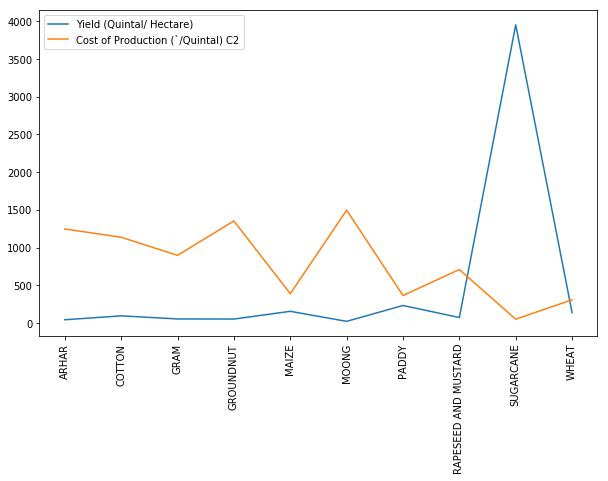

In [6]:
fig,axs = plt.subplots(figsize=(10,6))
crop_wise_yield = data.groupby(['Crop']).sum()['Yield (Quintal/ Hectare) ']
plt.plot(crop_wise_yield)
crop_wise_production = data.groupby(['Crop']).sum()['Cost of Production (`/Quintal) C2']/10
plt.plot(crop_wise_production)
plt.xticks(rotation ='vertical')
plt.legend()
# cost of production is 10 times as indicated
# this shows maximum yield/hectare is of SUGARCANE
# sugarcane has low cost of production/quintal 

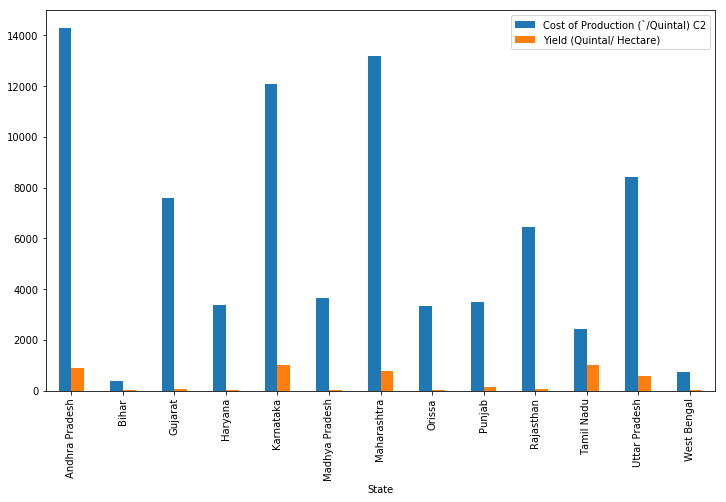

In [7]:
state_crop_yield = data.groupby(['State'])
index = list(state_crop_yield.indices.keys())
state_crop_yield.sum()[['Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']].plot(kind='bar',figsize=(12,7))

In [8]:
recommended_zone = pd.read_csv('../input/datafile (3).csv')

In [9]:
recommended_zone.drop('Unnamed: 4',axis=1,inplace=True)
recommended_zone.dropna(inplace=True)

In [10]:
recommended_zone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 75
Data columns (total 4 columns):
Crop                        50 non-null object
Variety                     50 non-null object
Season/ duration in days    50 non-null object
Recommended Zone            50 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [11]:
recommended_zone.head()

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."


In [12]:
def state1(row):
    if 'Andhra Pradesh' in row['Recommended Zone']:
        return 1
def state2(row):
    if 'Tamil Nadu' in row['Recommended Zone']:
        return 1
def state3(row):
    if 'Gujarat' in row['Recommended Zone']:
        return 1
def state4(row):
    if 'Orissa' in row['Recommended Zone']:
        return 1
def state5(row):
    if 'Punjab' in row['Recommended Zone']:
        return 1
def state6(row):
    if 'Haryana' in row['Recommended Zone']:
        return 1
def state7(row):
    if 'Uttar Pradesh' in row['Recommended Zone']:
        return 1
def state8(row):
    if 'Rajasthan' in row['Recommended Zone']:
        return 1
def state9(row):
    if 'Karnataka' in row['Recommended Zone']:
        return 1
def state10(row):
    if 'Madhya Pradesh' in row['Recommended Zone']:
        return 1
def state11(row):
    if 'West Bengal' in row['Recommended Zone']:
        return 1

In [13]:
recommended_zone['Andhra Pradesh'] = recommended_zone.apply(state1,axis=1)
recommended_zone['Tamil Nadu']=recommended_zone.apply(state2,axis=1)
recommended_zone['Gujarat']=recommended_zone.apply(state3,axis=1)
recommended_zone['Orissa']=recommended_zone.apply(state4,axis=1)
recommended_zone['Punjab']=recommended_zone.apply(state5,axis=1)
recommended_zone['Haryana']=recommended_zone.apply(state6,axis=1)
recommended_zone['Uttar Pradesh']=recommended_zone.apply(state7,axis=1)
recommended_zone['Rajasthan']=recommended_zone.apply(state8,axis=1)
recommended_zone['Karnataka']=recommended_zone.apply(state9,axis=1)
recommended_zone['Madhya Pradesh']=recommended_zone.apply(state10,axis=1)
recommended_zone['West Bangal']=recommended_zone.apply(state11,axis=1)
# Added the eleven states as columns in the dataframe  

In [14]:
recommended_zone.fillna(0).head()

,Crop,Variety,Season/ duration in days,Recommended Zone,Andhra Pradesh,Tamil Nadu,Gujarat,Orissa,Punjab,Haryana,Uttar Pradesh,Rajasthan,Karnataka,Madhya Pradesh,West Bangal
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


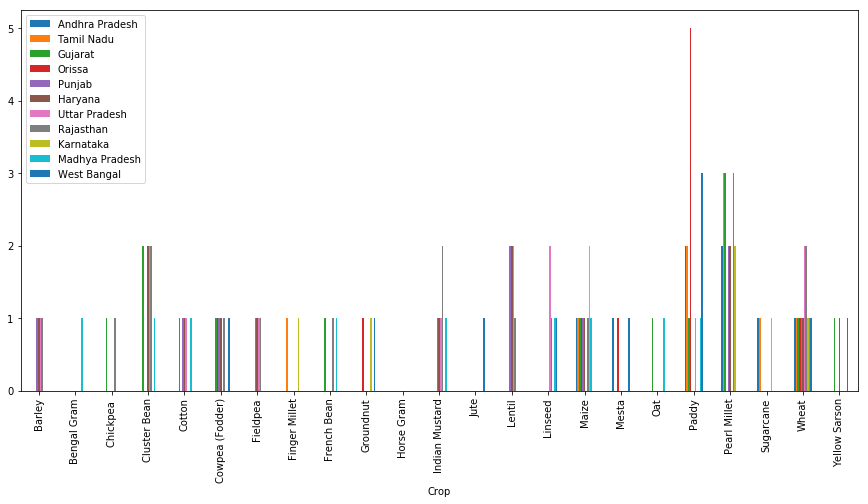

In [15]:
dataframe = recommended_zone.groupby('Crop').sum().plot(kind='bar',figsize=(15,7))
dataframe
# wheat is almost sown in all the mentioned states
# suitable zones for paddy is Orissa and west Bengal

In [16]:
dataframe = pd.DataFrame(recommended_zone.groupby('Season/ duration in days').count().reset_index())
dataframe1 = pd.DataFrame([dataframe.loc[1:27].sum(),dataframe.loc[29:37].sum()])
dataframe1.drop('Season/ duration in days',axis=1,inplace=True)
dataframe1 = dataframe1.assign(Duration = ['100-190','70-100']) 

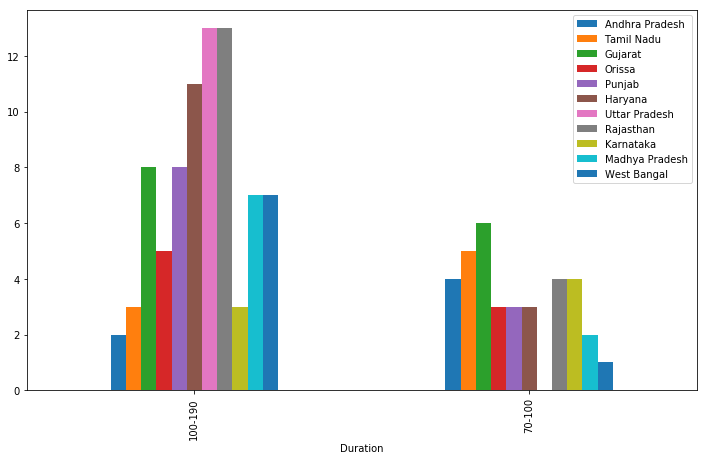

In [17]:
dataframe1[['Andhra Pradesh', 'Tamil Nadu',
       'Gujarat', 'Orissa', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan',
       'Karnataka', 'Madhya Pradesh', 'West Bangal', 'Duration']].plot(x = 'Duration',kind='bar',figsize=(12,7))
# most favorable state for growing crops in 100-190 days is UP and Rajasthan
# for 70-100 days it is Gujarat

In [18]:
dataframe1
# max number of crops are sown for 100-190 days not for 70-100 days

,Crop,Variety,Recommended Zone,Andhra Pradesh,Tamil Nadu,Gujarat,Orissa,Punjab,Haryana,Uttar Pradesh,Rajasthan,Karnataka,Madhya Pradesh,West Bangal,Duration
0,34,34,34,2,3,8,5,8,11,13,13,3,7,7,100-190
1,11,11,11,4,5,6,3,3,3,0,4,4,2,1,70-100


In [19]:
crop_production_data.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [20]:
crop_production_data.columns = ['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11']

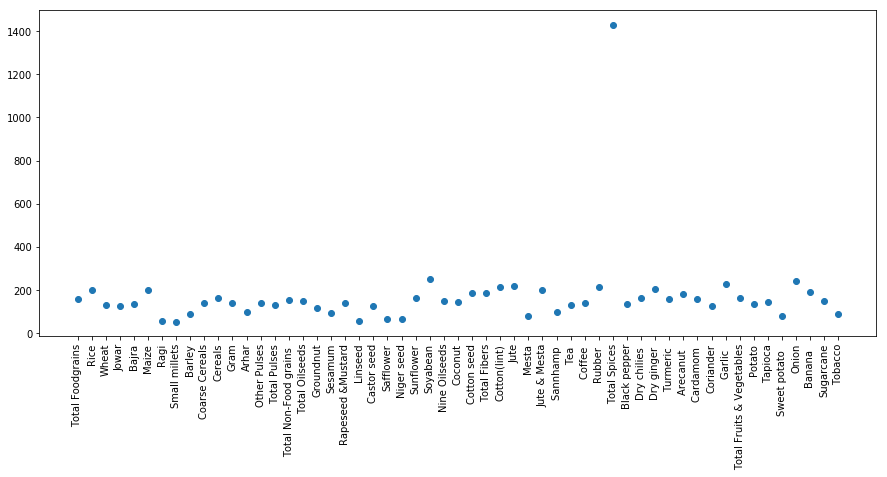

In [21]:
plt.subplots(figsize=(15,6))
plt.scatter(x='Crop',y='Production 2006-07',data = crop_production_data)
plt.xticks(rotation=90)
plt.show()